In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from colicoords import Data, CellListPlot, IterCellPlot, AutoIterCellPlot, save, load, CellPlot
import os
import mahotas as mh

In [2]:
import colicoords
colicoords.__file__

'C:\\Users\\jhs\\Programming\\cc_master\\colicoords\\__init__.py'

In [3]:
c41_raw = load('c41_cell_raw.hdf5')
epec_raw = load('epec_cell_raw.hdf5')

<IPython.core.display.Javascript object>


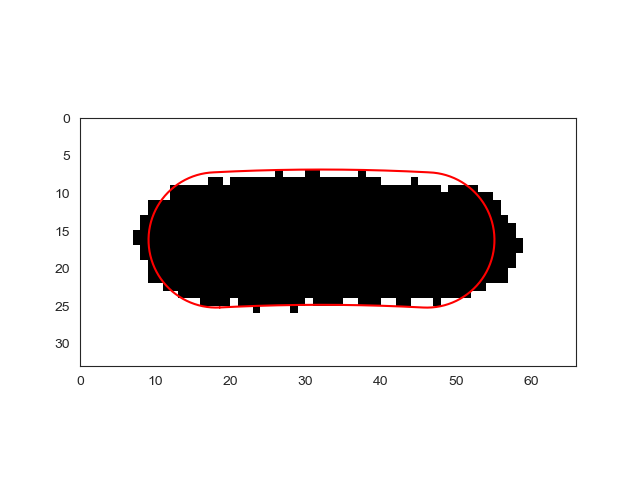

In [5]:
plt.figure()
cp = CellPlot(epec_raw[2083])
cp.plot_outline()
cp.imshow('binary')

In [6]:
 1565/2948

0.5308683853459973

In [7]:
c41_binary = c41_raw.copy()
res_c41 = c41_binary.optimize_mp()

In [8]:
epec_binary = epec_raw.copy()
res_epec = epec_binary.optimize_mp()

In [9]:
np.where(np.equal(res_c41, None))

(array([], dtype=int64),)

In [10]:
np.where(np.equal(res_epec, None))

(array([], dtype=int64),)

In [11]:
bn = ~np.equal(res_c41, None)

In [12]:
obj_c41 = np.array([r.objective_value for r in np.array(res_c41)[bn]])
a_c41 = np.array([c.data.binary_img.sum() for c in c41_binary[bn]])
f =  obj_c41 / a_c41

<IPython.core.display.Javascript object>


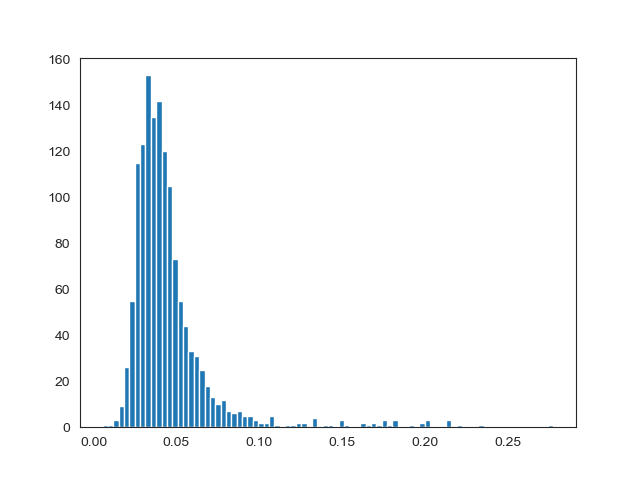

In [13]:
plt.figure()
h = plt.hist(f, bins='fd')

<IPython.core.display.Javascript object>


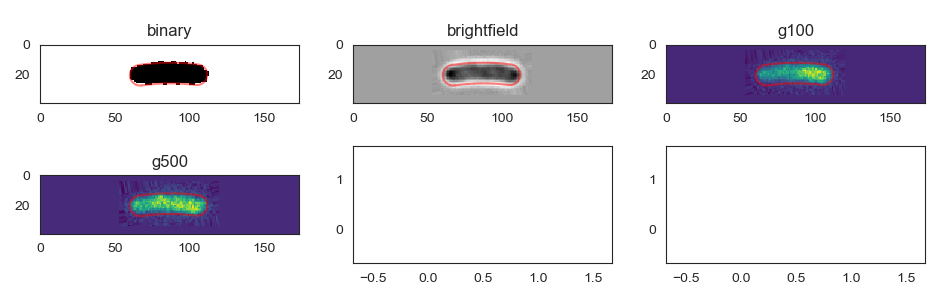

In [14]:
b = f < 0.1
aicp = AutoIterCellPlot(c41_binary[bn][b])
aicp.plot()

In [15]:
c41_selected = c41_binary[bn][b]

In [16]:
save('c41_binary_opt.hdf5', c41_selected)

In [17]:
bn = ~np.equal(res_epec, None)

In [18]:
obj_epec = np.array([r.objective_value for r in np.array(res_epec)[bn]])
a_epec = np.array([c.data.binary_img.sum() for c in epec_binary[bn]])
f =  obj_epec / a_epec

<IPython.core.display.Javascript object>


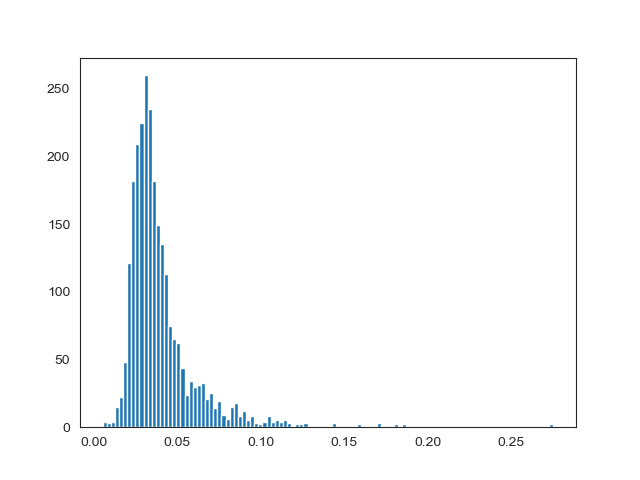

In [19]:
plt.figure()
h = plt.hist(f, bins='fd')

<IPython.core.display.Javascript object>


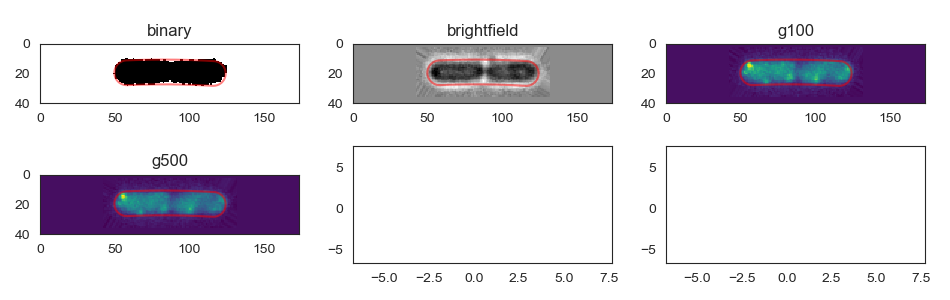

In [21]:
b = f < 0.08
aicp = AutoIterCellPlot(epec_binary[b])
aicp.plot()

In [23]:
epec_selected = epec_binary[b]
len(epec_selected)

2397

In [24]:
save('epec_binary_opt.hdf5', epec_selected)